<a href="https://colab.research.google.com/github/ThalesCavalcanti/MachineLearningGroundwork/blob/main/Parte_6_2_PyCaret_para_regressa%CC%83o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/pycaret/pycaret.git@master --upgrade

  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-t9g59bb7
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-t9g59bb7
  Resolved https://github.com/pycaret/pycaret.git to commit 58ec3c282d58e94727f9d5b77b49f241e9103ab3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import pycaret
print(pycaret.__version__)

3.4.0


In [3]:
import numpy as np

from pycaret.regression import (
    compare_models,
    create_model,
    evaluate_model,
    finalize_model,
    load_model,
    plot_model,
    predict_model,
    save_model,
    setup,
    tune_model
)

from pycaret.datasets import get_data

# PyCaret para Regressão

Neste exercício, você vai escolher outra base de dados do Pycaret para repetir a pipeline de treinamento realizada em aula.

## Base de dados

Recupere todas as bases de dados disponibilizadas pelo Pycaret.

In [4]:
all_bases = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


Desta vez, vamos utilizar o dataset `concrete`.

Recupere este dataset.

In [5]:
dataset = get_data('concrete')

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Verifique quantas instâncias e quantos atributos este dataset possui.

In [6]:
dataset.shape

(1030, 9)

Gere uma base de treinamento correspondente a 90% dos dados totais.

In [8]:
base_train = dataset.sample(frac=0.9, random_state=1)
base_train.shape

(927, 9)

Gere a base de testes, correspondente aos dados totais que não estão presentes na base de treinamento.

In [9]:
base_test = dataset.drop(base_train.index)
base_test.shape

(103, 9)

## Configuração do ambiente PyCaret

Gere um experimento, utilizando a base de treinamento, usando como variável alvo o atributo `strength`.

In [10]:
experiment = setup(data=base_train, target='strength')

,Description,Value
0,Session id,6762
1,Target,strength
2,Target type,Regression
3,Original data shape,"(927, 9)"
4,Transformed data shape,"(927, 9)"
5,Transformed train set shape,"(648, 9)"
6,Transformed test set shape,"(279, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


## Treinamento de vários modelos com validação cruzada

Execute uma comparação de modelos, organizando os resultandos pela coluna `RMSE` (*root mean squared error*). Solicite 10 folds.

In [12]:
models = compare_models(sort='RMSE', fold=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.4337,23.4942,4.7868,0.9131,0.1544,0.1182,0.7200
et,Extra Trees Regressor,3.4405,25.6836,4.9670,0.9055,0.1586,0.1195,0.2590
xgboost,Extreme Gradient Boosting,3.4483,26.1960,4.9816,0.9053,0.1575,0.1175,0.1960
gbr,Gradient Boosting Regressor,3.9777,29.0293,5.3161,0.8919,0.1720,0.1385,0.2800
rf,Random Forest Regressor,3.9627,30.4221,5.4278,0.8888,0.1765,0.1409,0.4350
dt,Decision Tree Regressor,5.0813,57.7075,7.4852,0.7912,0.2355,0.1721,0.0420
ada,AdaBoost Regressor,6.1937,59.2333,7.6549,0.7842,0.2857,0.2664,0.1330
knn,K Neighbors Regressor,7.6005,101.6997,9.9979,0.6239,0.3246,0.2905,0.0540
ridge,Ridge Regression,8.2480,109.5695,10.4240,0.5903,0.3392,0.3209,0.0240
lar,Least Angle Regression,8.2480,109.5696,10.4240,0.5903,0.3392,0.3209,0.0260


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

## Tuning dos modelos

Agora você vai testar o tuning do modelo com melhores resultados: Extreme Gradient Boosting.

Crie um modelo para Extreme Gradient Boosting.

In [13]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.1353,18.5179,4.3032,0.9320,0.1432,0.0996
1,3.6836,27.0502,5.2010,0.8670,0.1488,0.1199
2,3.7168,30.3196,5.5063,0.8632,0.1595,0.1207
3,3.7373,23.8261,4.8812,0.9230,0.1875,0.1416
4,4.0572,41.1305,6.4133,0.8803,0.1581,0.1225
5,2.7217,13.1033,3.6198,0.9558,0.1255,0.1047
6,3.1709,18.6001,4.3128,0.9407,0.1429,0.1169
7,3.3738,24.2987,4.9294,0.9119,0.1734,0.1237
8,3.0987,16.0238,4.0030,0.9361,0.1425,0.1004


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Exiba os parâmetros deste modelo.

In [14]:
print(lightgbm)

LGBMRegressor(n_jobs=-1, random_state=6762)


Execute o tuning do modelo.

In [15]:
lightgbm_tuning = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.9872,18.8609,4.3429,0.9308,0.1423,0.0967
1,3.6951,26.4275,5.1408,0.8700,0.1702,0.1312
2,3.5967,27.3098,5.2259,0.8768,0.1578,0.1179
3,3.4622,18.4744,4.2982,0.9403,0.1814,0.1360
4,3.4417,32.2640,5.6801,0.9061,0.1581,0.1129
5,2.6622,12.0376,3.4695,0.9594,0.1175,0.0977
6,2.9685,16.6067,4.0751,0.9470,0.1559,0.1214
7,3.1845,19.0886,4.3691,0.9308,0.1640,0.1228
8,3.2591,16.5969,4.0739,0.9339,0.1356,0.1044


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Exiba os parâmetros do modelo ajustado.

In [16]:
print(lightgbm_tuning)

LGBMRegressor(bagging_fraction=0.9, bagging_freq=7, feature_fraction=0.7,
              learning_rate=0.3, min_child_samples=21, min_split_gain=0.9,
              n_estimators=80, n_jobs=-1, num_leaves=256, random_state=6762,
              reg_alpha=0.5, reg_lambda=4)


## Gráficos

Exiba um gráfico dos resíduos do modelo ajustado por tuning de parâmetros.

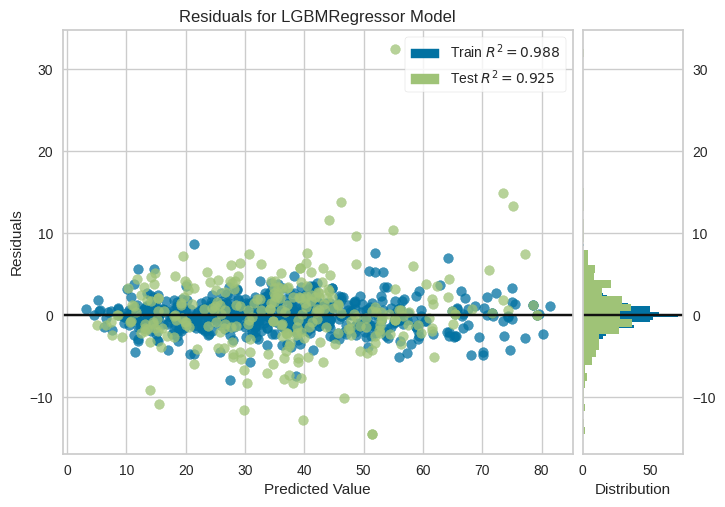

In [17]:
plot_model(lightgbm_tuning, plot='residuals')

Exiba um gráfico do erro do modelo ajustado por tuning de parâmetros.

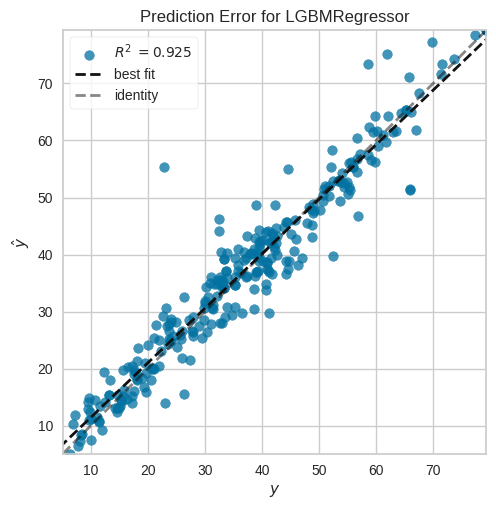

In [18]:
plot_model(lightgbm_tuning, plot='error')

Exiba um gráfico da importância dos atributos (*feature importance*) do modelo ajustado por tuning de parâmetros.

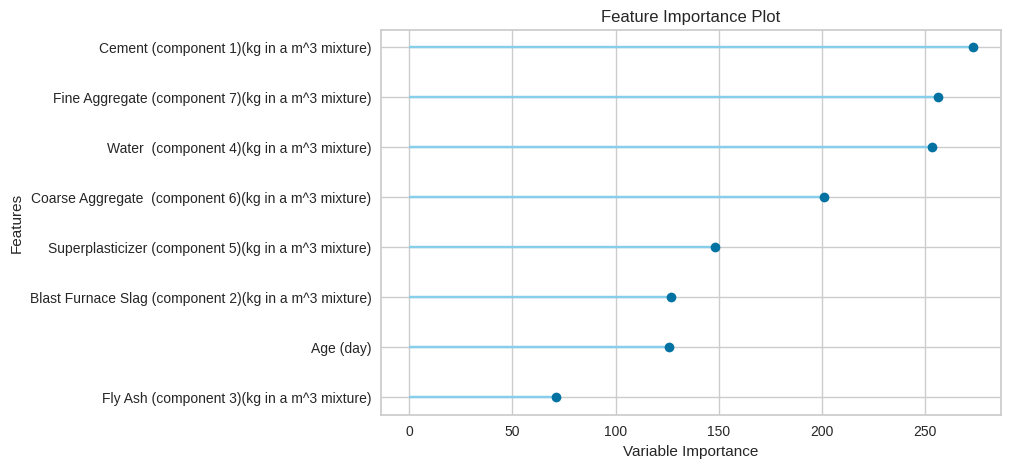

In [19]:
plot_model(lightgbm_tuning, plot='feature')

Exiba a avaliação do modelo.

In [20]:
evaluate_model(lightgbm_tuning)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Previsões com o modelo

Execute as previsões do modelo.

In [21]:
predict_model(lightgbm_tuning)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,3.0455,20.2076,4.4953,0.9247,0.1396,0.1050


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength,prediction_label
401,475.000000,0.000000,0.000000,162.000000,9.5,1044.000000,662.000000,28,58.520000,73.482903
507,424.000000,22.000000,132.000000,178.000000,8.5,822.000000,750.000000,28,62.049999,64.297929
781,296.000000,0.000000,0.000000,192.000000,0.0,1085.000000,765.000000,7,14.200000,13.129568
851,160.000000,188.000000,146.000000,203.000000,11.0,829.000000,710.000000,28,32.840000,35.557181
1,540.000000,0.000000,0.000000,162.000000,2.5,1055.000000,676.000000,28,61.889999,75.189425
...,...,...,...,...,...,...,...,...,...,...
866,160.000000,250.000000,0.000000,168.000000,12.0,1049.000000,688.000000,28,39.450001,42.268573
124,388.600006,97.099998,0.000000,157.899994,12.1,852.099976,925.700012,28,50.700001,50.399544
969,266.200012,112.300003,87.500000,177.899994,10.4,909.700012,744.500000,28,39.419998,41.154749
637,375.000000,0.000000,0.000000,186.000000,0.0,1038.000000,758.000000,7,26.059999,26.678602


Crie uma versão final do modelo ajustado por tuning de hiperparâmetros.

In [22]:
lightgbm_final = finalize_model(lightgbm_tuning)
print(lightgbm_final)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Cement (component 1)(kg in a m^3 '
                                             'mixture)',
                                             'Blast Furnace Slag (component '
                                             '2)(kg in a m^3 mixture)',
                                             'Fly Ash (component 3)(kg in a '
                                             'm^3 mixture)',
                                             'Water  (component 4)(kg in a m^3 '
                                             'mixture)',
                                             'Superplasticizer (component '
                                             '5)(kg in a m^3 mixture)',
                                             'Coarse Aggregate  (component '
                                             '6)(kg in a m...
                                    transformer=SimpleImputer(strategy=

Salve este modelo.

In [23]:
save_model(lightgbm_final, 'lightgbm_final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Cement (component 1)(kg in a m^3 '
                                              'mixture)',
                                              'Blast Furnace Slag (component '
                                              '2)(kg in a m^3 mixture)',
                                              'Fly Ash (component 3)(kg in a '
                                              'm^3 mixture)',
                                              'Water  (component 4)(kg in a m^3 '
                                              'mixture)',
                                              'Superplasticizer (component '
                                              '5)(kg in a m^3 mixture)',
                                              'Coarse Aggregate  (component '
                                              '6)(kg in a m...
                                     transformer=SimpleIm

Recarregue o modelo salvo.

In [24]:
lightgbm_loaded = load_model('lightgbm_final')

Transformation Pipeline and Model Successfully Loaded


Faça previsões com o modelo recarregado na base de testes.

In [25]:
prevision = predict_model(lightgbm_loaded, data=base_test)
prevision

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,3.2967,25.5647,5.0562,0.9166,0.1403,0.1097


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength,prediction_label
7,380.000000,95.000000,0.000000,228.000000,0.0,932.000000,594.000000,28,36.450001,38.891670
15,380.000000,0.000000,0.000000,228.000000,0.0,932.000000,670.000000,90,52.910000,49.925504
22,139.600006,209.399994,0.000000,192.000000,0.0,1047.000000,806.900024,3,8.060000,9.903018
25,380.000000,0.000000,0.000000,228.000000,0.0,932.000000,670.000000,270,53.299999,53.013942
26,380.000000,95.000000,0.000000,228.000000,0.0,932.000000,594.000000,270,41.150002,43.005112
...,...,...,...,...,...,...,...,...,...,...
964,143.699997,170.199997,132.600006,191.600006,8.5,814.099976,805.299988,28,29.870001,30.870072
971,312.700012,144.699997,0.000000,127.300003,8.0,999.700012,822.200012,28,44.520000,47.007214
972,145.699997,172.600006,0.000000,181.899994,3.4,985.799988,816.799988,28,23.740000,25.026655
983,136.399994,161.600006,125.800003,171.600006,10.4,922.599976,764.400024,28,29.070000,33.493131
